In [1]:
from pathlib import Path
import re

from matplotlib import pyplot as plt
from numpy import nan
import pandas as pd

%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

DIRECTORY_PATH = Path("data/measure_run_time")
DATA_FILE_PATH = DIRECTORY_PATH / "experiments.csv"

In [2]:
df = pd.read_csv(DATA_FILE_PATH, index_col=0)
df = df[df.exception.isnull()].drop(columns="exception")
data_points = []
gp_id = []
for run_id in df.index:
    m = re.search(r"N([0-9]+)_(.+)", run_id)
    if m is not None:
        data_points.append(int(m.group(1)))
        gp_id.append(m.group(2))
    else:
        data_points.append(nan)
        gp_id.append(nan)

df["data_points"] = data_points
df["gp_id"] = gp_id
df

,run_time,data_points,gp_id
run_id,,,
N1000_n0_Cholesky_cpu,12.015287,1000,n0_Cholesky_cpu
N1000_n0_mBCG_cpu,5.164015,1000,n0_mBCG_cpu
N1000_n50_mBCG_cpu,4.234276,1000,n50_mBCG_cpu
N1000_n150_mBCG_cpu,6.538199,1000,n150_mBCG_cpu
N1000_n250_mBCG_cpu,8.691845,1000,n250_mBCG_cpu
...,...,...,...
N14000_n150_mBCG_cuda,470.106525,14000,n150_mBCG_cuda
N14000_n250_mBCG_cuda,532.434752,14000,n250_mBCG_cuda
N15000_n50_mBCG_cuda,412.336361,15000,n50_mBCG_cuda


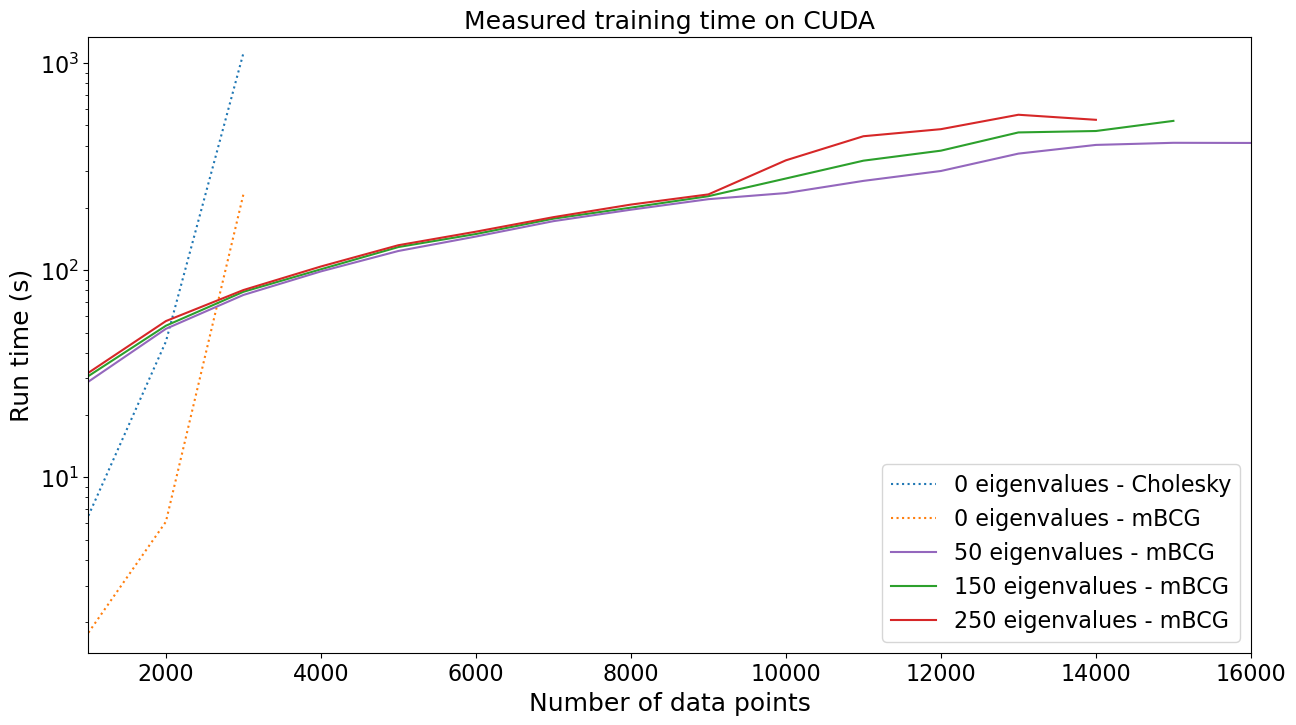

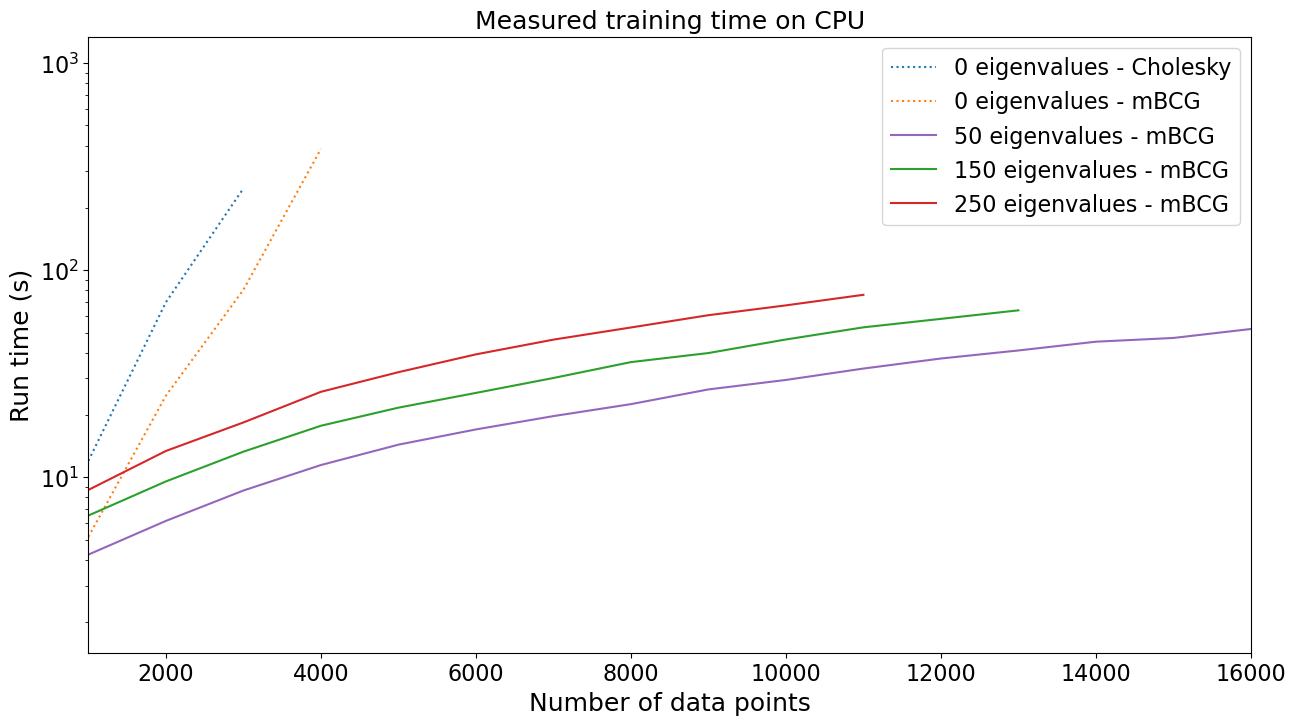

In [6]:
for i, device in enumerate(["cuda", "cpu"]):
    fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharex=True, sharey=True)
    for label, df_grouped in df[df.gp_id.str.contains(device)].groupby("gp_id"):
        style = "-"
        ax = df_grouped.plot(
            x="data_points",
            y="run_time",
            kind="line",
            style=":" if "n0" in label else "-",
            logy=True,
            ax=ax,
            label=re.sub(r"n([0-9]+)_([a-zA-Z]+)_" + device, r"\1 eigenvalues - \2", label),
            xlabel="Number of data points",
            ylabel="Run time (s)",
            title="Measured training time on " + device.upper(),
        )
    plt.xlim(min(df.data_points), max(df.data_points))
    plt.ylim(min(df.run_time) * 0.8, max(df.run_time) * 1.2)
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [0, 1, 4, 2, 3]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    fig.savefig(DIRECTORY_PATH / ("run_time_" + device + ".png"))